In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def lasso(X, y, lamb, use_intercept=True, tol=1e-8, max_iter=10_000):
    '''
    Compute the lasso regression 

    Parameters
    ----------
    X: ndarray (n x p)
        Feature matrix, features in column

    y: ndarray (n x 1)
    
    lamb: float
        lambda parameter for lasso
    
    use_intercept: bool
        use intercept or not

    tol: float

    max_iter: int
    '''
    n, p = X.shape
    # precompute X, y norm squared, mean
    X_norm_sq = np.linalg.norm(X, axis=0)**2
    X_mean = X.mean(axis=0)
    y_mean = y.mean()

    # precompute dot product
    yx = y.T @ X # 1 x p
    X_sum = np.ones(n).T @ X # 1 x p
    XX = X.T @ X # p x p. <x^k, x^j> locates at kth row and jth column
    np.fill_diagonal(XX, 0) # set the diagonal to be zero
    
    gamma = n * lamb/X_norm_sq

    bias = 0.0
    betas = np.zeros(p)

    for i in range(max_iter):
        old_bias = bias
        old_betas = betas
        zx = yx - bias * X_sum - betas @ XX # 1 x p, each entry is <z^j, x^j>
        beta_tilda = zx/X_norm_sq
        if use_intercept:
            bias = y_mean - betas @ X_mean
        betas = np.sign(beta_tilda) * np.maximum(np.abs(beta_tilda) - gamma, 0)
        if np.abs(old_bias-bias) < tol and (np.abs(old_betas - betas) < tol).all():
            break
    return bias, betas

Testing

$$
y = 3x_1-17x_2+5x_3+\epsilon
$$

In [3]:
true_beta = np.array([3, -17, 5])

In [4]:
sample_X = np.random.normal(size=(1000, 3))
epsilon = np.random.normal(size=1000)
sample_y = sample_X @ true_beta + epsilon

In [5]:
lambs = np.arange(0.01, 20, step = 0.01)

In [6]:
beta0, betas = tuple(zip(*map(lambda l: lasso(sample_X, sample_y, l, use_intercept=False), lambs)))
beta1, beta2, beta3 = tuple(zip(*betas))

In [7]:
log_lambs = np.log(lambs)

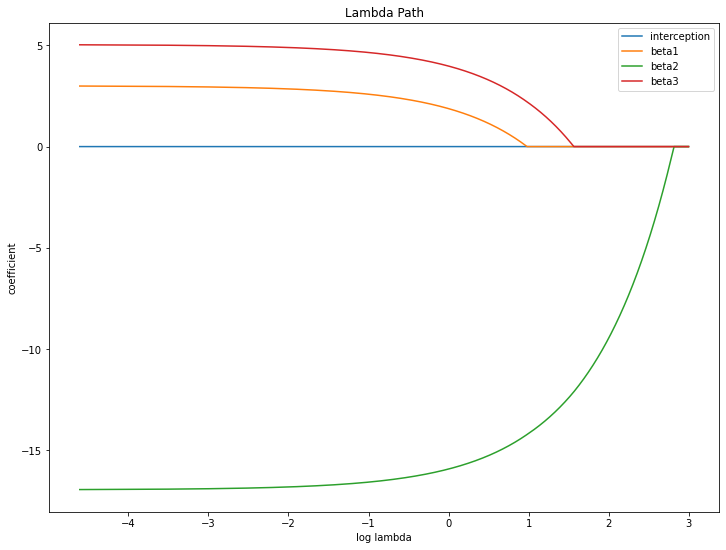

In [8]:
plt.figure(figsize=(12,9))
plt.plot(log_lambs, beta0, label='interception')
plt.plot(log_lambs, beta1, label='beta1')
plt.plot(log_lambs, beta2, label='beta2')
plt.plot(log_lambs, beta3, label='beta3')
plt.title('Lambda Path')
plt.xlabel('log lambda')
plt.ylabel('coefficient')
plt.legend()
plt.show()